# Исследование надёжности заёмщиков

**Цель исследования** — проверить выдвинутые гипотезы закзчика:
1. Наличие детей влияет на возврат кредита в срок.
2. Семейное положение влияет на возврат кредита в срок.
3. От уровня дохода зависит возврат кредита в срок.
4. Цель, на которую был взят кредит, влияет на вероятность возврата кредита в срок.

**Ход исследования**

Исследование пройдет в 4 этапа:
1. Обзор данных.
2. Предобработка данных.
3. Проверка гипотез.
4. Общий вывод по проведенному исследованию.

## Шаг 1. Изучение общей информации

### Изучение общей информации

С помощью библиотеки `pandas` прочитаем данные и просмотрим первые 10 строк таблицы, чтобы понять с какими данными необходимо будет работать:

In [1]:
import pandas as pd

df = pd.read_csv('./datasets/data.csv')
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Также необходимо получить общую информацию о таблице:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Вывод

Данные представляют из себя список информации заемщиках, а именно: количество детей, трудовой стаж, возраст, образование, семейное положение, пол, занятость, наличие задолжностей по возврату кредита, доход и цель получения кредита.

В данных втречаются пропуски, но только в колонках `days_employed` и `total_income` (трудовой стаж и доход соответственно). Причем количество пропусков равное. Вероятно пропуски присутствуют у заемщиков не имеющих постоянного места работы.

Также в столбце `days_employed` количество дней указано отрицательным числом и имеются аномалии (Например в строке с 
индексом 4. Весьма сомнительно что человек может иметь трудовой стаж более 900 лет).

Дополнительно требуется обратить внимание на столбец `purpose` (цель получения кредита). Указанные в нем цели не приведены к общим типам и записаны в свободной форме.

Следует отметить что столбец `education` имеет данные записанные разными регистарми.

Предварительно можно утверждать, что предоставленных данных будет достаточно для проверки гипотез после их предобработки.

## Шаг 2. Предобработка данных

### Обработка пропусков

#### Изучение природы пропусков

В самом начале оценим соотношение пропустков относительно всей длины датафрейма:

In [3]:
df.isna().mean()

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

Пропуски в столбцах `days_employed` и `total_income` занимают примерно по 10% от всей длины датафрейма. Это довольно большая часть данных. Но для того, чтобы понять, что именно я могу сделать с пропусками, в первую очередь требуется изучить их природу. В выводах к первому разделу я обратил внимание на то, что количество прокусков в колонках с трудовым стажем и доходом равны. Для начала посмотрим, какие типы занятостей имеются в предоставленных данных и в каком количестве.

In [4]:
df.groupby('income_type')['income_type'].count().sort_values(ascending = False)

income_type
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

В списке мы видим категорию "безработный", но в данную категорию попадает всего 2 заемщика, в то время как пропусков на 3 порядка больше. Изначальное предположение о природе пропусков неверно.

Продолжим изучать связь рода деятельности с наличием пропусков. Посчитаем количество пропусков для каждого из родов деятельности:

In [5]:
df[['income_type','days_employed','total_income']].groupby('income_type').apply(lambda group: group.apply(pd.isna).sum()).sort_values(by = 'days_employed', ascending = False)

,income_type,days_employed,total_income
income_type,,,
сотрудник,0,1105,1105
компаньон,0,508,508
пенсионер,0,413,413
госслужащий,0,147,147
предприниматель,0,1,1
безработный,0,0,0
в декрете,0,0,0
студент,0,0,0


Исходя из этого можно сделать вывод, что пропуски никак не связаны с родом занятий заемщика. И судя по тому, что количество пропусков в столбце с доходом и в столбце со стажем совпадает для каждой категории, то, скорее всего, пропуски находятся в одинаковых строках. Но требуется проверить и данное утверждение. Для этого удалим все строки с пропусками, и если их количество

In [6]:
df_dropped = df.dropna(subset = ['days_employed'])
df_dropped.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Как и предполагалось, пропуски в столбце стажа соответствуют пропускам в доходах. Это могло быть вызвано ошибкой при выгрузке данных, ошибкой при внесении человеком данных в базу, либо эти данные могли не быть запрошены при оформлении кредита данным клиентам (что крайне маловероятно).

#### Исследование аномалных значений в столбце стажа работы

Для заполнения пропусков в столбце с доходами мы расчитаем средний доход для каждой из категорий заемщиков по роду деятельности и их стажу. Для начала избавимся от аномалий (которые, скорее всего, возникли при выгрузке данных) в столбце стажа. Для этого для начала определим максимальные и минимальные значения в столбце стажа:

In [7]:
df[df['days_employed'] == max(df['days_employed'])]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью


In [8]:
df[df['days_employed'] == min(df['days_employed'])]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
16335,1,-18388.949901,61,среднее,1,женат / замужем,0,F,сотрудник,0,186178.934089,операции с недвижимостью


Подробнее рассмотрим "сломанную" часть, где стаж имеет положительное значение:

In [9]:
df[df['days_employed'] > 0]['days_employed'].min()

328728.72060451825

Выглядит все также неправдаподобно.

Продолжим исследование данных. Узнаем какие категории работников попадают в неправдоподобную часть (те строки, где стаж работы в днях имеет положительное значение). Также посчитаем количество попадающих в эту категорию строк:

In [10]:
df[df['days_employed'] > 0]['income_type'].unique().tolist()

['пенсионер', 'безработный']

Посчитаем количество пенсионеров попадающих в эту категорию:

In [11]:
df[(df['days_employed'] > 0) & (df['income_type'] == 'пенсионер')]['income_type'].count()

3443

Посчитаем количество безработных попадающих в эту категорию:

In [12]:
df[(df['days_employed'] > 0) & (df['income_type'] == 'безработный')]['income_type'].count()

2

Как мы видим, в неправдоподобную часть попадают все безработные и бОльшая часть пенсионеров. Из блока 2.1.1 мы знаем, что у безработных пропусков в столбцах дохода не было, значит и заполнять пропуска для этой категории заемщиков не нужно. Следовательно данные о их стаже не так важны.

Другое дело - пенсионеры. Среди пенсионеров имелись пропуски в столбце доходов. Поэтому проверим - имеются ли пропуски у пенсионеров со "сломанным" стажем в столбцах с доходами:

In [13]:
df[(df['days_employed'] > 0) & (df['income_type'] == 'пенсионер')]['income_type'].isna().sum()

0

Как мы видим, пенсионеры у которых "сломан" стаж не имеют пропусков в столбце доходов, так что и стаж их нам не особо интересен. Приступим к вычислению средних значений дохода в зависимости от стажа для каждой категории. Расчет будет произведен для следующих категорий: **сотрудник, компаньон и госслужащий**. Для остальных категорий проводить расчет либо не требуется, т.к. у них нет пропусков в столбце доходов, либо их доля к общей длине датасета слишком мала, либо это пенсионеры для которых я просто рассчитаю среднее значение дохода.

#### Исследование зависимости дохода от уровня образования и пола

Проведем исследование насколько зависит доход от образования и пола для категорий, расчет средних доходов которых мы будем проводить чтобы заполненить пропуски. Для этого напишем функцию для расчета среднего уровня дохода для указанной категории:

In [14]:
def avg_inc_cat(category):
    df_avg_inc = df.groupby(category)['total_income'].mean().reset_index().rename(columns = {'total_income': 'avg_income'})
    return df_avg_inc

Расчитаем средний уровень дохода в зависимости от пола заемщика:

[Text(0.5, 0, 'Пол'), Text(0, 0.5, 'Доход, руб')]

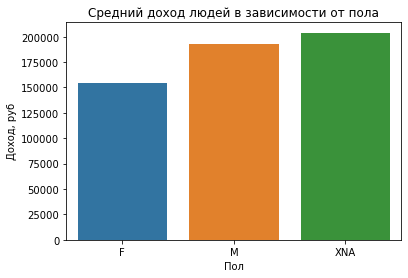

In [15]:
import seaborn as sns
sns.barplot(data = avg_inc_cat('gender'), x = 'gender', y = 'avg_income').set_title('Средний доход людей в зависимости от пола').axes.set(xlabel='Пол', ylabel='Доход, руб')

Как бы нам не хотелось жить в равноправном мире, данные говорят что до этого нам еще далеко и средний доход в зависимости от пола отличается. Еще мы заметили новую аномалию: у некоторых заемщиков не указан пол. Данная аномалия определенно вызвана человеческой ошибкой при внесении данных. Посмотрим насколько она велика:

In [16]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Всего один заемщик, без пропусков данных о стаже и доходе. На общий результат эта ошибка влиять не будет.

Теперь проверим влияет ли уровень образования на средний доход:

[Text(0.5, 0, 'образование, id'), Text(0, 0.5, 'Доход, руб')]

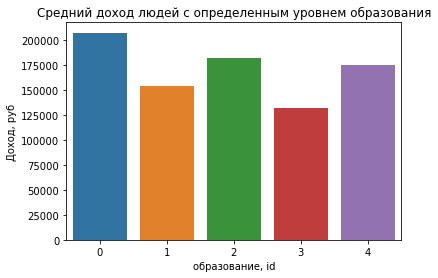

In [17]:
sns.barplot(data = avg_inc_cat('education_id'), x = 'education_id', y = 'avg_income').set_title('Средний доход людей с определенным уровнем образования').axes.set(xlabel='образование, id', ylabel='Доход, руб')

Явно заметно, что от уровня образования зависит доход. При заполнении пропусков это также необходимо учесть.

#### Исследование зависимости стажа от возраста заемщика.

Следующая проблема состоит в том, что для людей с пропусками в столбце доходов также отсутствует значение стажа. Предположим что стаж напрямую зависит от возраста. Проверим данное утверждение построив график зависимости стажа в годах от возраста заемщика имеющего род деятельности "сотрудник":

[Text(0.5, 0, 'возраст, лет'), Text(0, 0.5, 'стаж, лет')]

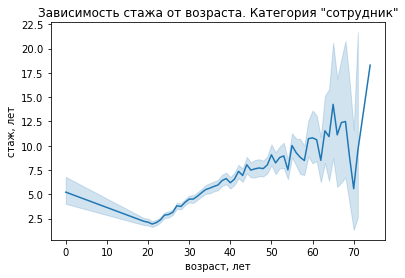

In [18]:
data_for_plot_de_s = df[(df['days_employed'] < 0) & (df['income_type'] == 'сотрудник')]['days_employed'].dropna() / -365.25
data_for_plot_dy_s = df[(df['days_employed'] < 0) & (df['income_type'] == 'сотрудник')]['dob_years'].dropna()
sns.lineplot(x=data_for_plot_dy_s, y=data_for_plot_de_s).set_title('Зависимость стажа от возраста. Категория "сотрудник"').axes.set(xlabel='возраст, лет', ylabel='стаж, лет')

Как оказалось, в столбце с возрастом также присутствует аномалия, и возраст некоторых заемщиков равен 0. Эта аномалия, скорее всего, вызвана человеческим фактором при внесении данных в датасет. Исправим это добавив дополнительное условие, что возраст не может быть равен 0:

[Text(0.5, 0, 'возраст, лет'), Text(0, 0.5, 'стаж, лет')]

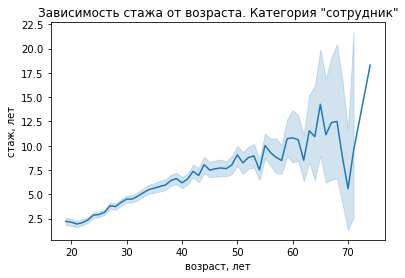

In [19]:
data_for_plot_de_s = df[(df['days_employed'] < 0) & (df['income_type'] == 'сотрудник') & (df['dob_years'] != 0)]['days_employed'].dropna() / -365.25
data_for_plot_dy_s = df[(df['days_employed'] < 0) & (df['income_type'] == 'сотрудник') & (df['dob_years'] != 0)]['dob_years'].dropna()
sns.lineplot(x=data_for_plot_dy_s, y=data_for_plot_de_s).set_title('Зависимость стажа от возраста. Категория "сотрудник"').axes.set(xlabel='возраст, лет', ylabel='стаж, лет')

Теперь график отражает действительность и мы видим, что в среднем стаж имеет прямую зависимость от возраста.

Построим аналогичные графики для остальных интересующих нас категорий:

[Text(0.5, 0, 'возраст, лет'), Text(0, 0.5, 'стаж, лет')]

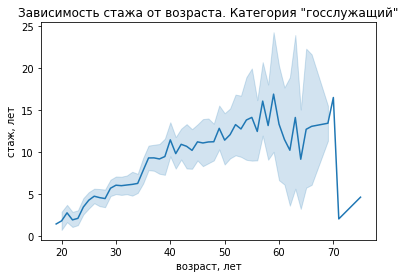

In [20]:
data_for_plot_de_c = df[(df['days_employed'] < 0) & (df['income_type'] == 'госслужащий') & (df['dob_years'] != 0)]['days_employed'].dropna() / -365.25
data_for_plot_dy_c = df[(df['days_employed'] < 0) & (df['income_type'] == 'госслужащий') & (df['dob_years'] != 0)]['dob_years'].dropna()
sns.lineplot(x=data_for_plot_dy_c, y=data_for_plot_de_c).set_title('Зависимость стажа от возраста. Категория "госслужащий"').axes.set(xlabel='возраст, лет', ylabel='стаж, лет')

[Text(0.5, 0, 'возраст, лет'), Text(0, 0.5, 'стаж, лет')]

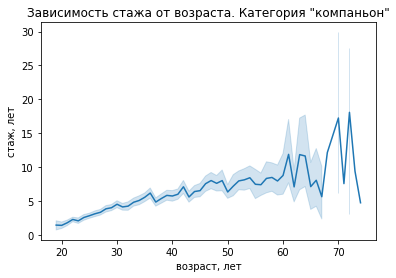

In [21]:
data_for_plot_de_c = df[(df['days_employed'] < 0) & (df['income_type'] == 'компаньон') & (df['dob_years'] != 0)]['days_employed'].dropna() / -365.25
data_for_plot_dy_c = df[(df['days_employed'] < 0) & (df['income_type'] == 'компаньон') & (df['dob_years'] != 0)]['dob_years'].dropna()
sns.lineplot(x=data_for_plot_dy_c, y=data_for_plot_de_c).set_title('Зависимость стажа от возраста. Категория "компаньон"').axes.set(xlabel='возраст, лет', ylabel='стаж, лет')

Исходя их вышепредставленных расчетов можно сделать вывод, что можно заполнить пропуска в колонке стажа исходя из возраста

#### Функция для расчета стажа заемщика в зависимости от его возраста

Теперь напишем функцию, которая будет расчитывать предполагаемый стаж исходя из востраста заемщика. Для этого применим линейную интерполяцию (за первую точку возмем усредненное значение стажа для заемщиков, чей возраст на 1-3 лет меньше указанного, за вторую - тех, чей возраст больше на 1-3 лет):

In [22]:
def days(age):
    years_min = df[df['dob_years'] != 0]['dob_years'].min()
    years_max = df[df['dob_years'] != 0]['dob_years'].max()
    if years_min + 3 <= age <= years_max - 3:
        days_emp = df[(df['dob_years'] <= age - 3) & (df['dob_years'] <= age - 1) & (df['days_employed'] < 0)]['days_employed'].mean() + (df[(df['dob_years'] <= age + 1) & (df['dob_years'] <= age + 3) & (df['days_employed'] < 0)]['days_employed'].mean() - df[(df['dob_years'] <= age - 3) & (df['dob_years'] <= age - 1) & (df['days_employed'] < 0)]['days_employed'].mean())/2
        return (days_emp)
    elif years_min + 3 > age:
        days_emp = df[(df['dob_years'] <= age) & (df['dob_years'] <= age + 2) & (df['days_employed'] < 0)]['days_employed'].mean() + (df[(df['dob_years'] <= age + 2) & (df['dob_years'] <= age + 5) & (df['days_employed'] < 0)]['days_employed'].mean() - df[(df['dob_years'] <= age) & (df['dob_years'] <= age + 2) & (df['days_employed'] < 0)]['days_employed'].mean())/1.4
        return (days_emp)
    elif years_max - 3 < age:
        days_emp = df[(df['dob_years'] <= age - 5) & (df['dob_years'] <= age - 2) & (df['days_employed'] < 0)]['days_employed'].mean() + (df[(df['dob_years'] <= age) & (df['dob_years'] <= age - 2) & (df['days_employed'] < 0)]['days_employed'].mean() - df[(df['dob_years'] <= age - 2) & (df['dob_years'] <= age - 5) & (df['days_employed'] < 0)]['days_employed'].mean())/1.4
        return (days_emp)

#### Заполнение пропусков в столбце стажа

Теперь мы готовы заполнить пропуски в столбце стажа.

In [23]:
inx_with_na = df.index[df['days_employed'].isna()].tolist()
for inx in inx_with_na:
    if df.loc[inx, 'dob_years'] != 0:
        df.loc[inx, 'days_employed'] = days(df.loc[inx, 'dob_years'])

Выполним проверку:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21515 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Мы видим, что до сих пор присутствует 10 пропусков. Изучим их внимательнее:

In [25]:
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье
2284,0,NaN,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,NaN,недвижимость
4064,1,NaN,0,среднее,1,гражданский брак,1,M,компаньон,0,NaN,ремонт жилью
5014,0,NaN,0,среднее,1,женат / замужем,0,F,компаньон,0,NaN,покупка недвижимости
6411,0,NaN,0,высшее,0,гражданский брак,1,F,пенсионер,0,NaN,свадьба
6670,0,NaN,0,Высшее,0,в разводе,3,F,пенсионер,0,NaN,покупка жилой недвижимости
8574,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,недвижимость
12403,3,NaN,0,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с коммерческой недвижимостью
13741,0,NaN,0,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,на проведение свадьбы
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье


В итоге мы имеем пропуски для людей у которых не заполнены данные ни о стаже, ни о возрасте, ни о доходах. Мы запомнили что такие данные есть и вернемся к ним позже.

Таким образом мы избавились почти от всех пропусков в столбце стажа и теперь сможем расчитать предполагаемый доход заемщиков исходя из стажа, образования и пола.

#### Функция для расчета среднего значения дохода для расчитываемых категорий

Напишем функцию, которая будет разбивать всех заемщиков попадающих в указанную категорию по типу занятости, образованию, полу и стажу. Для расчета будет использоваться усредненное значение дохода тех заемщиков, чей стаж находится в диапазоне +- год от искомого, плюс учитывается уровень образования, пол и тип занятости:

In [26]:
date_filter = (df['days_employed'] > df['days_employed'] - 356) & (df['days_employed'] < df['days_employed'] + 356)
income_type_filter = df['income_type'].isin(['сотрудник', 'компаньон', 'госслужащий'])
days_employed_filter = ~df['days_employed'].isna()
total_filter = date_filter & income_type_filter & days_employed_filter
 
transformed_df = df[total_filter].groupby(['education_id', 'gender', 'income_type'])['total_income'].transform('mean')
 
df.loc[total_filter, 'total_income'] = df.loc[total_filter, 'total_income'].fillna(transformed_df)

Проверим заполнение данных:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21515 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21104 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Не забываем, что мы до сих пор не учитывали пенсионеров. Еще мы помним, что для части заемщиков мы не смогли посчитать стаж по причине отсутствия у них возраста. Проверим куда у нас закрались пропуски для категорий сотрудник, компаньон, госслужащий:

In [28]:
df[df['total_income'].isna() & df['income_type'].isin(['сотрудник', 'компаньон', 'госслужащий']) & (df['dob_years'] != 0)]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


Нашлось одно исключение, для которого наша функция не сработала. Возможно не получилось корректно интерполировать данные для данного случая. Проверим какие еще заемщики из этой категории присутствуют в датасете:

In [29]:
df[(df['education_id'] == 3) & (df['gender'] == 'F') & (df['income_type'] == 'госслужащий')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2367,1,-3043.933615,37,начальное,3,гражданский брак,1,F,госслужащий,1,73471.521358,высшее образование
4951,0,-2531.601190,59,начальное,3,женат / замужем,0,F,госслужащий,0,105766.403301,строительство недвижимости
8142,0,-2310.128290,64,начальное,3,гражданский брак,1,F,госслужащий,0,89618.962330,сыграть свадьбу
17014,0,-1658.972637,39,начальное,3,женат / замужем,0,F,госслужащий,0,89618.962330,операции с коммерческой недвижимостью


Действительно, в данном случае линейная интерполяция не сработала. Тогда просто запоним эту строчку средним значением и сразу выведем её на экран для проверки:

In [30]:
df.loc[17014, 'total_income'] = df[(df['education_id'] == 3) & (df['gender'] == 'F') & (df['income_type'] == 'госслужащий')]['total_income'].mean()
df[(df['education_id'] == 3) & (df['gender'] == 'F') & (df['income_type'] == 'госслужащий')]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2367,1,-3043.933615,37,начальное,3,гражданский брак,1,F,госслужащий,1,73471.521358,высшее образование
4951,0,-2531.601190,59,начальное,3,женат / замужем,0,F,госслужащий,0,105766.403301,строительство недвижимости
8142,0,-2310.128290,64,начальное,3,гражданский брак,1,F,госслужащий,0,89618.962330,сыграть свадьбу
17014,0,-1658.972637,39,начальное,3,женат / замужем,0,F,госслужащий,0,89618.962330,операции с коммерческой недвижимостью


Осталась последняя большая категория с пропущенными значениями дохода. Это пенсионеры. Поскольку стаж у пенсионеров "сломан" нам придется просто заполнить пропуски средним значением для этой категории.

In [31]:
df[df['income_type'] == 'пенсионер'] = df[df['income_type'] == 'пенсионер'].fillna(df[df['income_type'] == 'пенсионер']['total_income'].mean())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21518 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21517 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Осталось меньше 10 заемщиков с пропусками. Изучим их:

In [33]:
df[df['days_employed'].isna() | df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1890,0,NaN,0,высшее,0,Не женат / не замужем,4,F,сотрудник,0,NaN,жилье
4064,1,NaN,0,среднее,1,гражданский брак,1,M,компаньон,0,NaN,ремонт жилью
5014,0,NaN,0,среднее,1,женат / замужем,0,F,компаньон,0,NaN,покупка недвижимости
5936,0,-2257.505356,58,высшее,0,женат / замужем,0,M,предприниматель,0,NaN,покупка жилой недвижимости
8574,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,недвижимость
12403,3,NaN,0,среднее,1,женат / замужем,0,M,сотрудник,0,NaN,операции с коммерческой недвижимостью
13741,0,NaN,0,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,на проведение свадьбы
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье


Мы видим, что при расчете стажа случайно зацепили категорию "предприниматель". Но ситуацию это не меняет, данные стажа далее в расчетах использоваться не будут, а для расчета дохода для данной категории слишком мало данных (как мы помним, предпринимателей было всего 2 на весь датасет). Итак, осталось всего 8 строк в которых встречаются пропуски данных. Проверим какая это доля от всего датасета:

In [34]:
df.isna().mean()

children            0.000000
days_employed       0.000325
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.000372
purpose             0.000000
dtype: float64

Всего 0,04%. За неимением возможности заполнить эти пропуски просто удалим эти данные.

In [35]:
df = df.dropna().reset_index(drop = True)
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

Заменим также нулевые значения возраста. Для начала узнаем, сколько именно у нас таких строк:

In [36]:
df[df['dob_years'] == 0]['dob_years'].count()

94

Заполним пропуска в столбце возраста, рассчитав значение исходя из стажа:

In [37]:
def years_old(days_emp):
    if days_emp < 0:
        return int(df[(df['days_employed'] > days_emp - 365) & (df['days_employed'] < days_emp + 365)]['dob_years'].mean())
    else:
        return 0

In [38]:
df.loc[df['dob_years'] == 0, 'dob_years'] = df.loc[df['dob_years'] == 0, 'days_employed'].apply(lambda x: years_old(x))

In [39]:
df[df['dob_years'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [40]:
df[df['dob_years'] == 0].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1175,0,370879.508002,0,среднее,1,женат / замужем,0,F,пенсионер,0,313949.845188,получение дополнительного образования
1897,0,370144.537021,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,127400.268338,на покупку автомобиля
2283,0,137127.465690,0,среднее,1,вдовец / вдова,2,F,пенсионер,0,137127.465690,недвижимость


**Вывод**

Было проведено исследование, от каких факторов зависит доход и проведено заполнение рассчитываемых пропусков в столбце доходов. Столбец со стажем использовался для расчета дохода и далее в расчетах не понадобится. Как и столбец с возрастом, бОльшую часть нулевых значений которого мы также заполнили исходя из указанного стажа. Часть нулевых значений пришлось оставить из-за неимения возможности расчета исходя из значения стажа. Также было обнаружено несколько аномалий/ошибок в данных.

### Замена типа данных

Просмотрим типы данных встречающихся в нашем датасете:

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21517 entries, 0 to 21516
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21517 non-null  int64  
 1   days_employed     21517 non-null  float64
 2   dob_years         21517 non-null  int64  
 3   education         21517 non-null  object 
 4   education_id      21517 non-null  int64  
 5   family_status     21517 non-null  object 
 6   family_status_id  21517 non-null  int64  
 7   gender            21517 non-null  object 
 8   income_type       21517 non-null  object 
 9   debt              21517 non-null  int64  
 10  total_income      21517 non-null  float64
 11  purpose           21517 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Из данных требующих обработки хочется выделить следующие: стаж (указан в днях, имеет отрицательное значение, есть "сломанные" значения, записан вещественным числом. В последующем исследовании нам не пригодится) и доход (записан в вещественном формате, необходимо перевести в целочисленный).

Итак, мы имеем что из данных, которые нам потребуются в последующем и требуют замены их типа, у нас столбец дохода. Приведем значения в этом столбце к целочисленным значениям и проверим замену:

In [42]:
df['total_income'] = df['total_income'].astype('int')
df['total_income'].dtypes

dtype('int32')

**Вывод**

Мы заменили тип данных в столбце дохода на целочисленные знаения.

### Обработка дубликатов

В столбце `education` из-за записанных в разных регистах данных встречаются пропуски. Для того, что бы наглядно это подвердить сравним количество уникальных значений в сталбцах `education` и `education_id`:

In [43]:
print(f'Столбец "education": {len(df["education"].unique())}\nСтолбец "education_id": {len(df["education_id"].unique())}')

Столбец "education": 15
Столбец "education_id": 5


Как наглядно видно: вариантов образования всего 5, в то время, как из названий 15. Изучим подробнее откуда берется такая разница:

In [44]:
df["education"].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Все из-за неоднотипного внесения данных в базу. Опять же эта ошибка явно вызвана человеческим фактором. Исправим это и сразу же проверим:

In [45]:
df['education'] = df['education'].str.lower()
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Теперь в этом столбце дубликатов уровня образования нет. Проверим теперь данные на наличие явных дубликатов данных:

In [46]:
df.duplicated().sum()

0

Явных дубликатов нет.

**Вывод**

Мы избавились от дубликатов в колонке образования и проверили датафрейм на наличие явных дубликатов.

### Лемматизация

Лемматизация пригодится нам для обработки информации, предоставленной в столбце `purpose` (цель получения кредита), поскольку данные, как нами было выше отмечено, вносились туда в свободной форме. 

In [59]:
from pymystem3 import Mystem
m = Mystem()
pbar = tqdm()
pbar.reset(total=len(df['purpose']))
for index in range(len(df['purpose'])):
    df.loc[index, 'lemmatized'] = ','.join(m.lemmatize(df.loc[index, 'purpose']))
    pbar.update()
df['lemmatized']

0it [00:00, ?it/s]

0                         покупка, ,жилье,\n
1               приобретение, ,автомобиль,\n
2                         покупка, ,жилье,\n
3            дополнительный, ,образование,\n
4                       сыграть, ,свадьба,\n
                        ...                 
21512                операция, ,с, ,жилье,\n
21513             сделка, ,с, ,автомобиль,\n
21514                        недвижимость,\n
21515    на, ,покупка, ,свой, ,автомобиль,\n
21516           на, ,покупка, ,автомобиль,\n
Name: lemmatized, Length: 21517, dtype: object

**Вывод**

Теперь провести категоризацию данных по цели станет возможным.

### Категоризация данных

Изучим данные о цели получения кредита, полученные после лемматизации.

In [60]:
purp_list = []
for index in range(len(df['lemmatized'])):
    purp_list.extend(df.loc[index ,'lemmatized'].split(','))
purp_unique = set(purp_list)
purp_unique

{'\n',
 ' ',
 'автомобиль',
 'высокий',
 'для',
 'дополнительный',
 'жилой',
 'жилье',
 'заниматься',
 'коммерческий',
 'на',
 'недвижимость',
 'образование',
 'операция',
 'подержанный',
 'подержать',
 'покупка',
 'получение',
 'приобретение',
 'проведение',
 'профильный',
 'ремонт',
 'с',
 'свадьба',
 'свой',
 'сдача',
 'сделка',
 'семья',
 'со',
 'собственный',
 'строительство',
 'сыграть'}

Итак, изучив все уникальные слова, полученные лемматизацие, можно прийти к выводу, что целей на которые берется кредит не так уж и много. А именно: недвижимость (ключевые слова: жилье, недвижимость), ремонт (ключевые слова: ремонт, строительство), свадьба (ключевые слова: свадьба), автомобили (ключевые слова: автомобиль), образование (ключевые слова: образование). Дополнительного внимания требует значение "операция" т.к. это слово имеет значение как в медицине, так и в торговле. Найдем все строки, в которых встречается слово "операция" не в контексте недвижимости:

In [61]:
df[df['lemmatized'].str.contains('операция') & (~df['lemmatized'].str.contains('недвижимость')) & (~df['lemmatized'].str.contains('жилье'))]['lemmatized'].count()

0

Слово "операция" используется только в категории "недвижимость".

Присвоим каждому типу цели категорию, для этого напишем функцию определения категории:

In [62]:
def purpose_type(purp_lemm):
    if 'автомобиль' in purp_lemm:
        return 'автомобиль'
    elif 'ремонт' in purp_lemm or 'строительство' in purp_lemm:
        return 'ремонт'
    elif 'жилье' in purp_lemm or 'недвижимость' in purp_lemm:
        return 'недвижимость'
    elif 'свадьба' in purp_lemm:
        return 'свадьба'
    elif 'образование' in purp_lemm:
        return 'образование'

Добавим столбец, в котором укажем тип цели:

In [63]:
df['purpose_type'] = df['lemmatized'].apply(purpose_type)

**Вывод**

Теперь существует всего 5 типов целей и они указаны для каждой стоки в датасете.

## Шаг 3. Проверим изначально поставленные гипотезы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

Для начала расчитаем среднее количество задержек по возврату кредитов для всех заемщиков:

In [64]:
print(f'Среднее количество задолжностей на одного заемщика: {df["debt"].mean():.3f}')

Среднее количество задолжностей на одного заемщика: 0.081


Расчитаем среднее количество задолжностей на одного заемщика с определенным количеством детей:

In [65]:
df_children = df.groupby('children')['debt'].mean().round(decimals=3).sort_values(ascending = False)
df_children

children
 20    0.105
 4     0.098
 2     0.094
 1     0.092
 3     0.082
 0     0.075
-1     0.021
 5     0.000
Name: debt, dtype: float64

Мы видим отрицательное значение (-1) и неправдоподобное значение (20). Скорее всего сюда закралась ошибка, и вместо -1 должно быть 1, а вместо 20 - 2. Исправим это:

In [66]:
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)

Перезапишем созданный нами датафрейм:

In [67]:
df_children = df.groupby('children')['debt'].mean().round(decimals=3).sort_values(ascending = False)
df_children

children
4    0.098
2    0.095
1    0.091
3    0.082
0    0.075
5    0.000
Name: debt, dtype: float64

Для наглядности построим график:

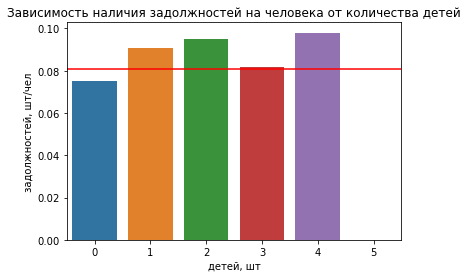

In [74]:
import matplotlib.pyplot as plt
df_child = pd.DataFrame({'children': df_children.keys().tolist(), 'debt': df_children.values.tolist()})
ax = sns.barplot(data = df_child, x='children', y = 'debt').set_title('Зависимость наличия задолжностей на человека от количества детей').axes.set(xlabel='детей, шт', ylabel='задолжностей, шт/чел')

_ = plt.axhline(df['debt'].mean(), color='red')

Посмотрим насколько велико множество заемщиков с 5 детьми:

In [75]:
df[df['children'] == 5]['children'].count()

9

Всего 9 человек с 5ю детьми, относительно общей массы слишком маленькая часть чтобы её учитывать в общей статистике.

**Вывод**

Как мы видим, с количеством детей количество задолжностей действительно растет. Из закономерности выбивается только группа с 3 и с 5 детьми. Но для любого количества детей, кроме 5 (но это скорее исключение т.к. их доля слишком мала), верно утверждение, что кол-во задолжностей на заемщика с детьми больше, чем на заемщика без детей.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

Расчитаем среднее количество задолжностей на человека каждого из 5 семейных положений:

In [76]:
df_family = df.groupby('family_status')['debt'].mean().round(decimals=3).sort_values(ascending = False)
df_family

family_status
Не женат / не замужем    0.097
гражданский брак         0.093
женат / замужем          0.075
в разводе                0.071
вдовец / вдова           0.066
Name: debt, dtype: float64

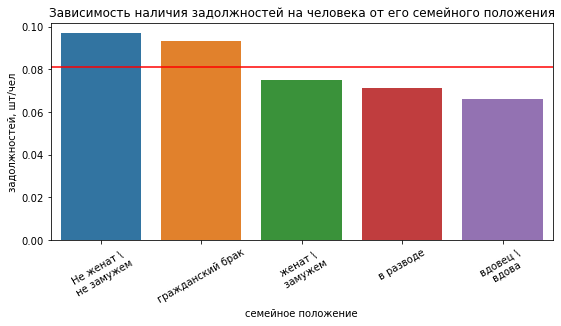

In [78]:
df_family_status = pd.DataFrame({'family_status': df_family.keys().tolist(), 'debt': df_family.values.tolist()})
fig = plt.figure(figsize=(9,4))

ax = sns.barplot(data = df_family_status, x='family_status', y = 'debt')
ax.set_title('Зависимость наличия задолжностей на человека от его семейного положения')
ax.set_xlabel(xlabel='семейное положение')
ax.set_ylabel(ylabel='задолжностей, шт/чел')

new_labels = ['\\\n'.join(lable.get_text().split('/')) for lable in ax.xaxis.get_ticklabels()]

ax.xaxis.set_ticklabels(new_labels, rotation=30)
_ = plt.axhline(df['debt'].mean(), color='red')
plt.show()

**Вывод**

Не состоящие в браке или состоящие в браке люди значительно чаще имеют задолжность по кредиту.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [79]:
income_ranges = [100000, 150000, 200000, 250000, 300000]

debt_columns = []
for index in range(len(income_ranges) -1):
    rng = range(income_ranges[index],income_ranges[index+1])
    debt_columns.append(df[df['total_income'].isin(rng)]['debt'].mean())
debt_columns.insert(0, df[df['total_income'].isin(range(0 ,income_ranges[index]))]['debt'].mean())
debt_columns.append(df[df['total_income'] >= income_ranges[-1]]['debt'].mean())
income_ranges_names = list(map(lambda x: str(income_ranges[x]) + ' - ' + str(income_ranges[x+1]), range(len(income_ranges)-1)))
income_ranges_names.insert(0, f'до {income_ranges[0]}')
income_ranges_names.append(f'более {income_ranges[-1]}')
df_income = pd.DataFrame({'уровень дохода':income_ranges_names, 'задолжностей на человека':debt_columns})
df_income

,уровень дохода,задолжностей на человека
0,до 100000,0.082890
1,100000 - 150000,0.085275
2,150000 - 200000,0.089304
3,200000 - 250000,0.070906
4,250000 - 300000,0.064631
5,более 300000,0.071525


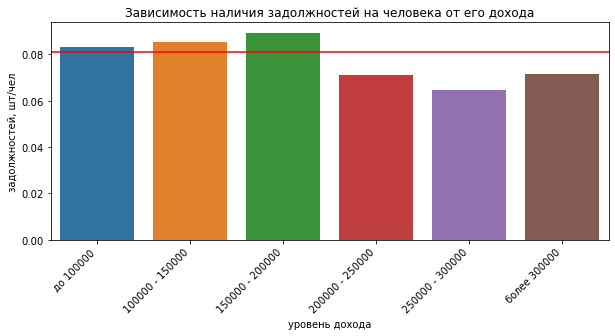

In [80]:
fig = plt.figure(figsize=(10,4))

ax = sns.barplot(data = df_income, x='уровень дохода', y = 'задолжностей на человека')
ax.set_title('Зависимость наличия задолжностей на человека от его дохода')
ax.set_ylabel(ylabel='задолжностей, шт/чел')

new_labels = ['\\\n'.join(lable.get_text().split('/')) for lable in ax.xaxis.get_ticklabels()]

ax.xaxis.set_ticklabels(new_labels)
plt.xticks(rotation=45, ha='right')
_ = plt.axhline(df['debt'].mean(), color='red')
plt.show()

**Вывод**

Как мы видим, начиная с дохода в 200 т.р. количество задолжностей на человека становится меньше среднего значения.

- Как разные цели кредита влияют на его возврат в срок?

Расчитаем среднее количество задолжностей на человека каждого из 5 семейных положений:

In [81]:
df_purpose = df.groupby('purpose_type')['debt'].mean().round(decimals=3).sort_values(ascending = False)
df_purpose

purpose_type
автомобиль      0.093
образование     0.092
свадьба         0.079
недвижимость    0.072
ремонт          0.072
Name: debt, dtype: float64

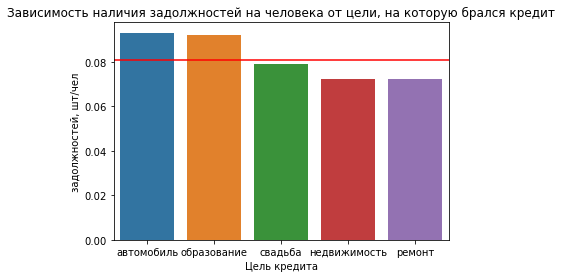

In [82]:
df_purpose_type = pd.DataFrame({'purpose_type': df_purpose.keys().tolist(), 'debt': df_purpose.values.tolist()})
sns.barplot(data = df_purpose_type, x='purpose_type', y = 'debt').set_title('Зависимость наличия задолжностей на человека от цели, на которую брался кредит').axes.set(xlabel='Цель кредита', ylabel='задолжностей, шт/чел')
_ = plt.axhline(df['debt'].mean(), color='red')

**Вывод**

Заемщики берущие кредит на автомобиль или образование чаще имеют просрочки по платежам, чем люди, берущие кредит на другие цели.

## Шаг 4. Общий вывод

В ходе исследования мы проверили следующие гипотезы:
1. **Наличие детей влияет на возврат кредита в срок.**
Как оказалось, да влияет. В среднем, чем больше детей у заемщика, тем больше шанс того, что у него образуется задолженость.

2. **Семейное положение влияет на возврат кредита в срок.**
Да, влияет. Для категорий "не женат/не замужем" и "гражданский брак" количество задолжностей на человека выше.

3. **От уровня дохода зависит возврат кредита в срок.**
Да, влияет. Чем выше в среднем доход, тем меньше задолжностей на человека.

4. **Цель, на которую был взят кредит, влияет на вероятность возврата кредита в срок.**
Да, в среднем люди берущие кредит на автомобиль или образование менее охотно возвращают кредит вовремя.

Исходя из полученных результатов идеальный заемщик это вдовец/вдова без детей, с зарплатой более 200 т.р., покупающий недвижимость или делающий ремонт.